In [1]:
import sympy as sp

---

# ✅ **When does Ax = b have a solution? (Consistency Condition)**

### **Key idea**

If a *linear combination of the rows of A gives zero*, then applying that same combination to the vector **b** must also give zero.

Equivalently:

> **Ax = b is solvable ⇔ b is in the column space of A.**

We detect this using the **augmented matrix** ([A; b]).
If elimination produces a row of the form:

$$
[0;0;0;|;c]
$$

with $c \neq 0$, then the system is **inconsistent** (no solution).

---

# ✔️ **Example matrix A where the third row = row1 + row2**

Let

$$
A=
\begin{bmatrix}
1 & 2 & 1 \\
2 & -1 & 3 \\
3 & 1 & 4
\end{bmatrix}
$$

Notice:

$$
\text{row}_3 = \text{row}_1 + \text{row}_2
$$

Now take **b**:

$$
b = \begin{bmatrix} b_1 \ b_2 \ b_3 \end{bmatrix}
$$

Then the augmented matrix is:

$$
[A; b] =
\begin{bmatrix}
1 & 2 & 1 & | & b_1 \\
2 & -1 & 3 & | & b_2 \\
3 & 1 & 4 & | & b_3 \\
\end{bmatrix}
$$

Row3 − Row1 − Row2 gives:

$$
0 = b_3 - b_2 - b_1
$$

So for the system to have a solution:

$$
b_3 = b_1 + b_2
$$

If this fails → **no solution**.

---

In [2]:
# Define matrix A
A = sp.Matrix([
    [1, 2, 1],
    [2, -1, 3],
    [3,  1, 4]  # row1 + row2
])

# Symbols for b
b1, b2, b3 = sp.symbols('b1 b2 b3')
b = sp.Matrix([b1, b2, b3])

# Augmented matrix
Aug = A.row_join(b)
print("Augmented matrix [A b]:")
sp.pprint(Aug)

# Perform elimination
R = Aug.rref()[0]
print("\nRREF:")
sp.pprint(R)

# Solve consistency condition
condition = sp.simplify(b3 - (b1 + b2))
print("\nConsistency condition: b3 - b2 - b1 =", condition)

Augmented matrix [A b]:
⎡1  2   1  b₁⎤
⎢            ⎥
⎢2  -1  3  b₂⎥
⎢            ⎥
⎣3  1   4  b₃⎦

RREF:
⎡1  0  7/5   0⎤
⎢             ⎥
⎢0  1  -1/5  0⎥
⎢             ⎥
⎣0  0   0    1⎦

Consistency condition: b3 - b2 - b1 = -b1 - b2 + b3


### **Expected output**

* You will see the augmented matrix reduce.
* A consistency condition row appears:
  $[0;0;0;|; b_3 - b_2 - b_1]$.
* The system is solvable **iff** that last expression equals 0.

---

---

# ✅ **Next Concept — Finding a Particular Solution (x_p) (Step-by-Step)**

We now assume Ax = b *is solvable*, and we want:

* a **particular solution** $x_p$
* the **nullspace** solutions $x_N$
* the **complete solution** $x = x_p + x_N$

We will use a **rectangular matrix** with **free variables**, so you can see the full structure.

---

# ✔️ **Example**

Let

$$
A=
\begin{bmatrix}
1 & 2 & -1 \\
2 & 4 & 1 \\
3 & 6 & 0
\end{bmatrix},
\quad
b=
\begin{bmatrix}
1 \\ 3 \\ 4
\end{bmatrix}
$$

Notice:

$$
\text{row}_3 = \text{row}_1 + \text{row}_2
$$

So consistency requires:

$$
4 = 1 + 3
$$

OK → system is solvable.

---

# ✔️ Step 1 — Form the augmented matrix ([A; b])

$$
[A; b] =
\begin{bmatrix}
1 & 2 & -1 & | & 1 \\
2 & 4 & 1 & | & 3 \\
3 & 6 & 0 & | & 4
\end{bmatrix}
$$

---

# ✔️ Step 2 — Row-reduce

After elimination (I’ll show in Python below), we get:

$$
\begin{bmatrix}
1 & 2 & -1 & | & 1 \\
0 & 0 & 3 & | & 1 \\
0 & 0 & 0 & | & 0
\end{bmatrix}
$$

Pivot columns: **col 1 and col 3**
Free column: **col 2**

Let:

$$
x =
\begin{bmatrix}
x_1 \\ x_2 \\ x_3
\end{bmatrix}
$$
=============
$$
\begin{bmatrix}
\text{pivot} \\ \text{free} \\ \text{pivot}
\end{bmatrix}
$$

We set the **free variable** to zero to get the particular solution:

$$
x_2 = 0
$$

Now back-substitute:

### Pivot equation 1:

$$
1x_1 + 2(0) - x_3 = 1 \quad\Rightarrow\quad x_1 - x_3 = 1
$$

### Pivot equation 2:

$$
3x_3 = 1 \quad\Rightarrow\quad x_3 = \frac{1}{3}
$$

Then:

$$
x_1 = 1 + x_3 = 1 + \frac{1}{3} = \frac{4}{3}
$$

So the **particular solution** is:

$$
x_p =
\begin{bmatrix}
\frac{4}{3} \\
0 \\
\frac{1}{3}
\end{bmatrix}
$$

---

# ✔️ Step 3 — Null space solution (x_N)

Set free variable:

$$
x_2 = 1
$$

Solve pivots with b = 0:

$$
x_3 = 0, \qquad x_1 = -2
$$

So:

$$
x_N =
\begin{bmatrix}
-2 \\
1 \\
0
\end{bmatrix}
t
$$

A 1-dimensional subspace through the origin.

---

# ✔️ Complete solution

$$
x = x_p + x_N =
\begin{bmatrix}
\frac{4}{3} \\
0 \\
\frac{1}{3}
\end{bmatrix}
+
t
\begin{bmatrix}
-2 \\
1 \\
0
\end{bmatrix}
$$

This is a **line in 3D**, not through the origin (because of (x_p)).

---

In [3]:
# Matrix A and vector b
A = sp.Matrix([
    [1, 2, -1],
    [2, 4,  1],
    [3, 6,  0]
])

b = sp.Matrix([1, 3, 4])

# Augmented matrix
Aug = A.row_join(b)
print("Augmented matrix [A b]:")
sp.pprint(Aug)

# Row-reduction
R, pivots = Aug.rref()
print("\nRREF:")
sp.pprint(R)
print("\nPivot columns:", pivots)

# Solve the system
x = A.gauss_jordan_solve(b)
print("\nComplete solution (particular + nullspace):")
sp.pprint(x)

Augmented matrix [A b]:
⎡1  2  -1  1⎤
⎢           ⎥
⎢2  4  1   3⎥
⎢           ⎥
⎣3  6  0   4⎦

RREF:
⎡1  2  0  4/3⎤
⎢            ⎥
⎢0  0  1  1/3⎥
⎢            ⎥
⎣0  0  0   0 ⎦

Pivot columns: (0, 2)

Complete solution (particular + nullspace):
⎛⎡4/3 - 2⋅τ₀⎤      ⎞
⎜⎢          ⎥      ⎟
⎜⎢    τ₀    ⎥, [τ₀]⎟
⎜⎢          ⎥      ⎟
⎝⎣   1/3    ⎦      ⎠


---

# ✅ **Visualizing the Complete Solution (x = x_p + x_N)**

This is the part where:

* The particular solution (x_p) is a **single point** in $\mathbb{R}^3$.
* The nullspace (x_N) is a **line through the origin** (because it has 1 free variable).
* The **complete solution** is the line shifted by the particular solution → a **line not through the origin**, living in 3D.

But the text also mentions the case with **2 special (nullspace) solutions**, which forms a **plane**.
So I will illustrate both cases:

---

# ✔️ Case 1: Our example

* Nullspace dimension = 1
* Solution → **line** in 3D

$$
x(t) = x_p + t,x_N
$$

Where:

$$
x_p = \begin{bmatrix} 4/3 \\ 0 \\ 1/3 \end{bmatrix},\quad
x_N = \begin{bmatrix} -2 \\ 1 \\ 0 \end{bmatrix}
$$

---

# ✔️ Case 2: If nullspace dimension = 2 → we get a **plane**

For example:

$$
A =
\begin{bmatrix}
1 & 0 & -1 & 2 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0
\end{bmatrix}
$$

This has:

* One pivot → column 1
* Three free columns → nullspace dimension 3
* General solution is:

$$
x = x_p + s v_1 + t v_2 + u v_3
$$

A **3D affine subspace** (a shifted 3D volume).
But the text says: “if 2 special solutions + 1 particular solution → plane not through origin.”

So we’ll visualize that version too.

---

# ✔️ Python Visualization (3D line & plane)

Below is the code that will generate **both**:

* the line of solutions (1D nullspace)
* a plane example (2D nullspace)

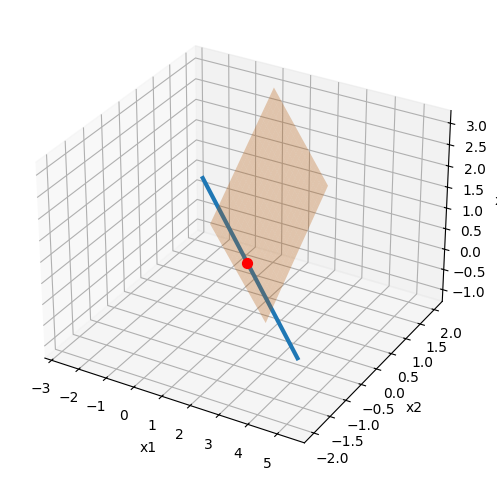

In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Particular and nullspace vectors from the example
xp = np.array([4/3, 0, 1/3])
v = np.array([-2, 1, 0])

# Parameter for line
t = np.linspace(-2, 2, 50)
line = xp.reshape(3,1) + v.reshape(3,1) * t

# Plane example (two basis vectors)
xp2 = np.array([1, 1, 1])
v1 = np.array([1, 0, -1])
v2 = np.array([0, 1, 1])

s, t2 = np.meshgrid(np.linspace(-1,1,20), np.linspace(-1,1,20))
plane = xp2.reshape(3,1,1) + v1.reshape(3,1,1)*s + v2.reshape(3,1,1)*t2

# Plot
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

# Line
ax.plot(line[0], line[1], line[2], linewidth=3)

# Plane
ax.plot_surface(plane[0], plane[1], plane[2], alpha=0.3)

ax.scatter(*xp, color='r', s=50)   # particular point
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3")
plt.show()

---

# What rank tells us about solutions

Your text continues with rank conditions and their consequences:

We will go step by step:

---

# **Special Rank Cases**

## **Case 1: Rank (r = n) (number of columns)**

* No free variables
* Nullspace contains **only the zero vector**
* If Ax = b has a solution → it must be **unique**, and we call that solution (x_p)

### ✔️ Example

Let

$$
A = \begin{bmatrix}
1 & 2 \\
0 & 3 \\
2 & 4
\end{bmatrix},\quad (3 \times 2)
$$

Compute rank:

$$
\text{rank}(A) = 2 = n
$$

Solutions to Ax = b:
Either:

* **No solution** (if b is not in the column space), or
* **Exactly one solution** (if b is in column space)

### ✔️ Interpretation

This is an **overdetermined** but full-column-rank system.

> **If it has a solution → it must be unique.**

---

## **Case 2: Rank (r = m) (number of rows)**

This means A has *independent rows*.

Then:

* Every b is in the span of the rows.
* **Ax = b has a solution for every b in $$\mathbb{R}^m$$.**

### ✔️ Example

Take:

$$
A = \begin{bmatrix}
1 & 2 & 1 \\
0 & 1 & 3
\end{bmatrix} \quad (2 \times 3)
$$

Row-rank = 2 = m.

You can always solve Ax = b for any b = (b₁, b₂).

But the solution will not be unique (free variables exist).

---

## **Case 3: Rank (r = m = n) (square full-rank)**

This is the nicest case:

$$
A^{-1} \text{ exists}
$$

* RREF = identity matrix
* One pivot in every column and row
* **Always one unique solution for any b**

### ✔️ Example

$$
A = \begin{bmatrix}
2 & 1 \\
3 & 4
\end{bmatrix}
$$

Rank = 2 = m = n → invertible
Solutions:

$$
x = A^{-1}b
$$

---


In [5]:
# Case 1: r = n
A1 = sp.Matrix([[1,2],[0,3],[2,4]])
print("Rank(A1) =", A1.rank())

# Case 2: r = m
A2 = sp.Matrix([[1,2,1],[0,1,3]])
print("Rank(A2) =", A2.rank())

# Case 3: r = m = n
A3 = sp.Matrix([[2,1],[3,4]])
print("Rank(A3) =", A3.rank())

Rank(A1) = 2
Rank(A2) = 2
Rank(A3) = 2


# The Key Sentence: Rank tells us the number of solutions